***MELANOMA SKIN CANCER CLASSIFICATION USING DEEP LEARNING***

###Installing packages and libraries for classification model

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense,Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential

In [ ]:
! gdown 15nP0rjzh8n4b87zTEqnlRAKZo4hisvvm

Downloading...
From: https://drive.google.com/uc?id=15nP0rjzh8n4b87zTEqnlRAKZo4hisvvm
To: /content/archive.zip
100% 104M/104M [00:01<00:00, 65.3MB/s]


In [ ]:
!unzip /content/archive.zip -d /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_643.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_644.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_645.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_646.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_647.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_648.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_649.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_65.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_650.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_651.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_652.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_653.jpg  
  inflating: /

In [ ]:
file_path = "/content/melanoma_cancer_dataset/train";

In [ ]:
# Retrieving the class names
name_class=os.listdir(file_path)
name_class

['malignant', 'benign']

In [ ]:
# Getting the file paths of the images
filepaths=list(glob.glob(file_path+'/**/*.*'))

In [ ]:
filepaths[0:5]

['/content/melanoma_cancer_dataset/train/malignant/melanoma_9018.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_6120.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_5125.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_5733.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_5822.jpg']

In [ ]:
# Extracting labels from file paths
labels=list(map(lambda x:os.path.split(os.path.split(x)[0])[1],filepaths))
labels[0:5]

['malignant', 'malignant', 'malignant', 'malignant', 'malignant']

In [ ]:
# Creating a DataFrame to store file paths and corresponding labels
filepath=pd.Series(filepaths,name='Filepath').astype(str)
labels=pd.Series(labels,name='Label')
data=pd.concat([filepath,labels],axis=1)
data=data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,/content/melanoma_cancer_dataset/train/benign/...,benign
1,/content/melanoma_cancer_dataset/train/maligna...,malignant
2,/content/melanoma_cancer_dataset/train/benign/...,benign
3,/content/melanoma_cancer_dataset/train/benign/...,benign
4,/content/melanoma_cancer_dataset/train/benign/...,benign


In [ ]:
print(data.iloc[:,0])

0       /content/melanoma_cancer_dataset/train/benign/...
1       /content/melanoma_cancer_dataset/train/maligna...
2       /content/melanoma_cancer_dataset/train/benign/...
3       /content/melanoma_cancer_dataset/train/benign/...
4       /content/melanoma_cancer_dataset/train/benign/...
                              ...                        
9600    /content/melanoma_cancer_dataset/train/maligna...
9601    /content/melanoma_cancer_dataset/train/maligna...
9602    /content/melanoma_cancer_dataset/train/benign/...
9603    /content/melanoma_cancer_dataset/train/benign/...
9604    /content/melanoma_cancer_dataset/train/maligna...
Name: Filepath, Length: 9605, dtype: object


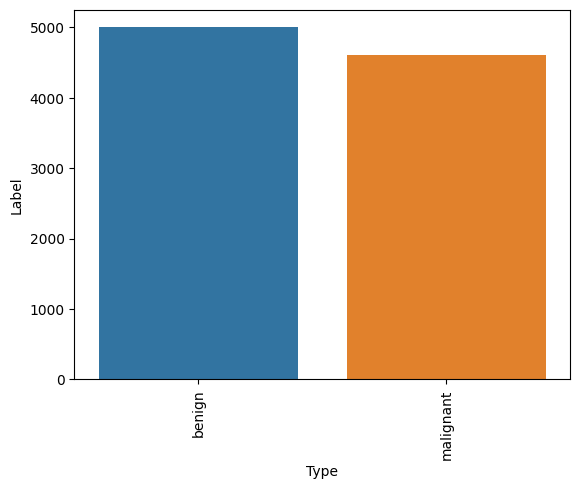

In [ ]:
# Counting the occurrences of each label
counts=data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [ ]:
data_aug = data

####Train_Test_Split

In [ ]:
# Train-Test data Split
train,test=train_test_split(data,test_size=0.25,random_state=42)

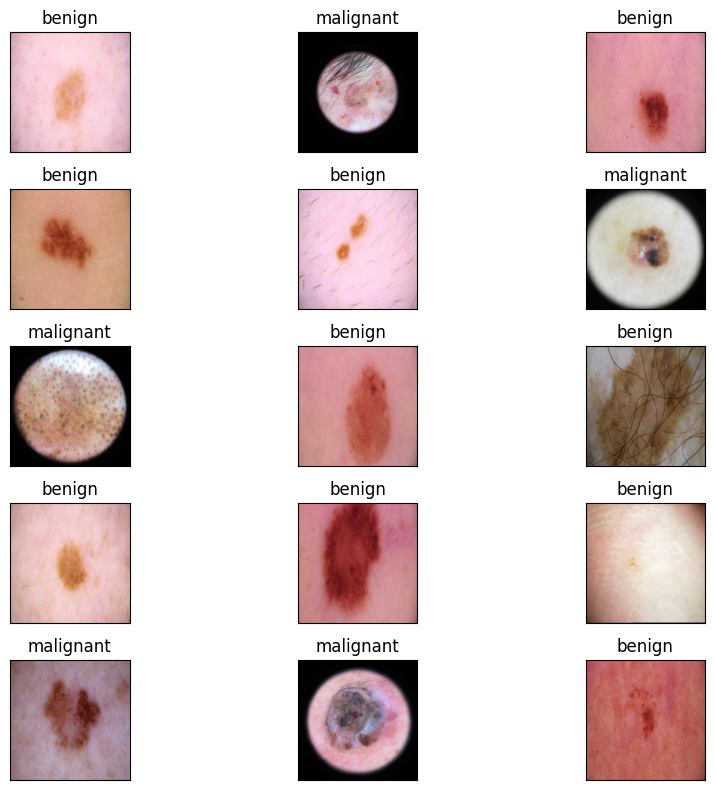

In [ ]:
# Displaying some images from the dataset
fig,axes=plt.subplots(nrows=5,ncols=3,figsize=(10,8),subplot_kw={'xticks':[],'yticks':[]})
for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

### DATA_PREPROCESSING

In [ ]:
# Data Preprocessing
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [ ]:
# Generate batches of training data from the DataFrame
train_gen=train_datagen.flow_from_dataframe( 
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42    
)

# Generate batches of validation data from the DataFrame
valid_gen=train_datagen.flow_from_dataframe( 
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42    
)

# Generate batches of test data from the DataFrame
test_gen=test_datagen.flow_from_dataframe( 
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
    
)

Found 7203 validated image filenames belonging to 2 classes.
Found 2402 validated image filenames belonging to 2 classes.
Found 2402 validated image filenames belonging to 2 classes.


In [ ]:
# Custom Sequential Model
model = Sequential()
model.add(Conv2D(16, 3, padding = 'same', activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(16, 3, padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))

model.add(Conv2D(64, 3, padding='same', activation = 'relu'))
model.add(Conv2D(64, 3, padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(128, 3, padding='same', activation = 'relu'))
model.add(Conv2D(128, 3, padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='sigmoid'))


In [ ]:
#Compile the custom model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
### Function for early stopping of training epochs if no change in validation accuracy
my_callbacks=[EarlyStopping(monitor='val_accuracy',
                           min_delta=0,
                           patience=2,
                           mode='auto')]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        9280      
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        36928     
                                                        

In [ ]:
# Fit the model on the training data with validation
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=40
)

Epoch 1/40
226/226 [==============================] - 42s 117ms/step - loss: 0.5565 - accuracy: 0.7470 - val_loss: 0.3599 - val_accuracy: 0.8476
Epoch 2/40
226/226 [==============================] - 26s 116ms/step - loss: 0.3469 - accuracy: 0.8537 - val_loss: 0.3111 - val_accuracy: 0.8689
Epoch 3/40
226/226 [==============================] - 25s 109ms/step - loss: 0.3052 - accuracy: 0.8741 - val_loss: 0.3030 - val_accuracy: 0.8709
Epoch 4/40
226/226 [==============================] - 25s 110ms/step - loss: 0.2766 - accuracy: 0.8862 - val_loss: 0.2723 - val_accuracy: 0.8913
Epoch 5/40
226/226 [==============================] - 25s 110ms/step - loss: 0.2624 - accuracy: 0.8889 - val_loss: 0.2467 - val_accuracy: 0.8959
Epoch 6/40
226/226 [==============================] - 25s 110ms/step - loss: 0.2273 - accuracy: 0.9042 - val_loss: 0.2464 - val_accuracy: 0.8968
Epoch 7/40
226/226 [==============================] - 25s 111ms/step - loss: 0.2227 - accuracy: 0.9103 - val_loss: 0.2546 - val_ac

In [ ]:
# Save the trained model
model.save("custom_model.h5")

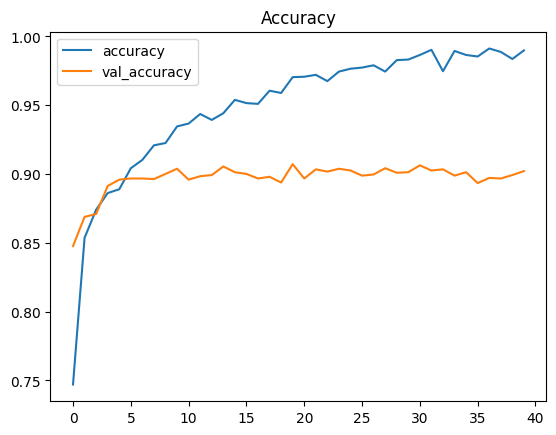

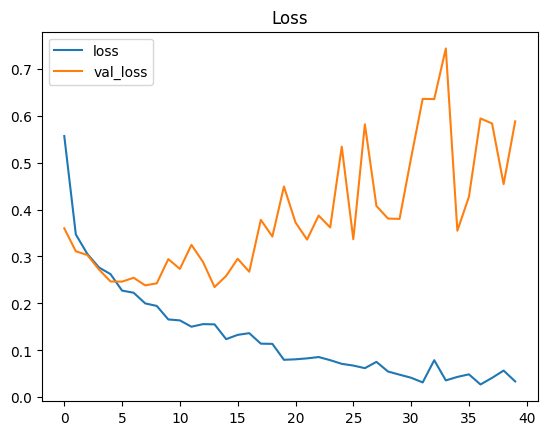

In [ ]:
# Plot the accuracy history
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
pd.DataFrame(history.history)[['loss','val_loss']].plot()
# Plot the loss history
plt.title("Loss")
plt.show()

In [ ]:
# Evaluate the model on the test data
results=model.evaluate(test_gen,verbose=0)
print(" Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1]*100))

 Test Loss: 0.58776
Test Accuracy: 90.22%


In [ ]:
# Predict classes for the test data
pred=model.predict(test_gen)
pred=np.argmax(pred,axis=1)

# Map the predicted class indices to labels
labels=(train_gen.class_indices)
labels=dict((v,k) for k,v in labels.items())
pred=[labels[k] for k in pred]

76/76 [==============================] - 5s 68ms/step


In [ ]:
# Get the true labels from the test data
y_test=list(test.Label)
# Print classification report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      benign       0.91      0.90      0.91      1269
   malignant       0.89      0.90      0.90      1133

    accuracy                           0.90      2402
   macro avg       0.90      0.90      0.90      2402
weighted avg       0.90      0.90      0.90      2402



In [ ]:
# Calculate and print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

[[1146  123]
 [ 112 1021]]


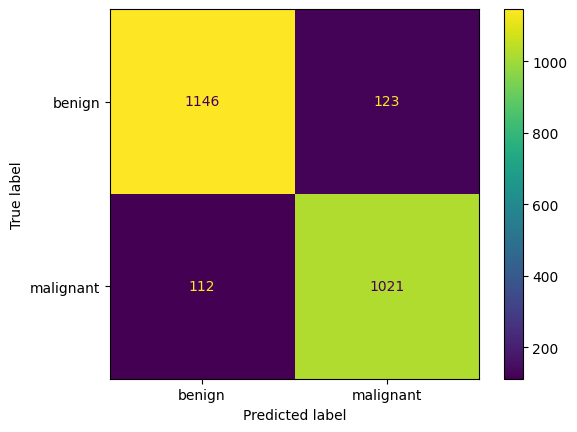

In [ ]:
# Display confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, pred)

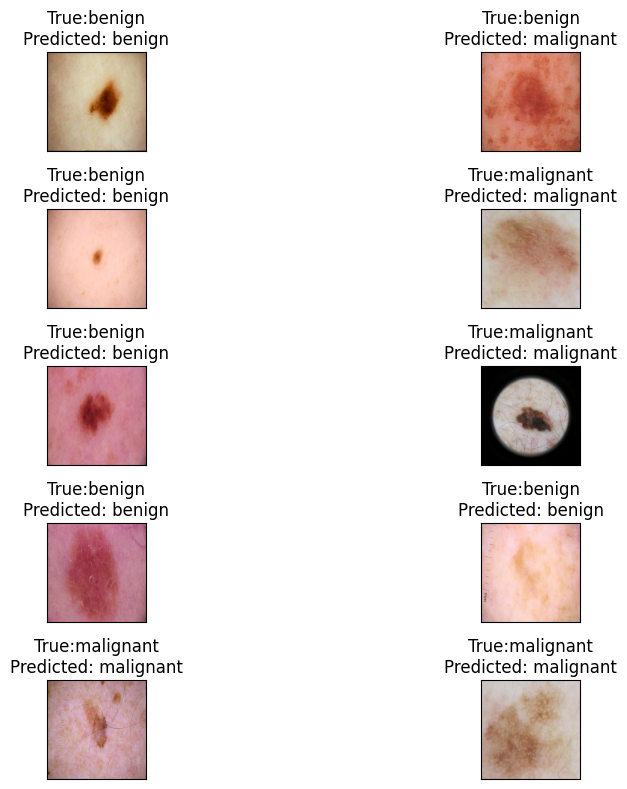

In [ ]:
# Display sample images with true and predicted labels
fig,axes=plt.subplots(nrows=5, ncols=2, figsize=(12,8),
                     subplot_kw={'xticks': [], 'yticks': []})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True:{test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


In [ ]:
# Load and resize the image
img_path='demo.jpg'

img=cv2.imread(img_path)
img=cv2.resize(img,(100,100))

# Preprocess the image
x=np.expand_dims(img,axis=0)
x=preprocess_input(x)
result=model.predict(x)
print((result*100).astype('int'))

1/1 [==============================] - 0s 362ms/step
[[  0 100]]


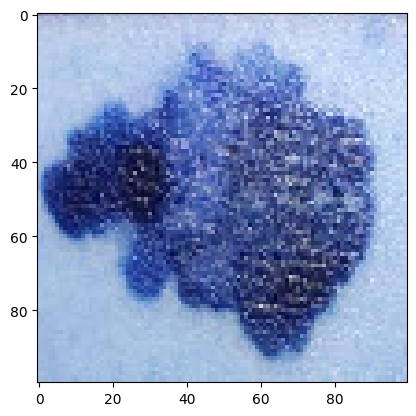

In [ ]:
# Visualize the image
plt.imshow(img)

In [ ]:
# Make predictions using the model
p=list((result*100).astype('int'))
pp=list(p[0])
print(pp)

[0, 100]


In [ ]:
# Get the probabilities for each class
print("Largest probability is:",max(pp))

Largest probability is: 100


In [ ]:
# Find the class with the highest probability
index=pp.index(max(pp))

In [ ]:
name_class=['benign','malignant']

In [ ]:
# Show the predicted class as the title and display the image
name_class[index]

'malignant'

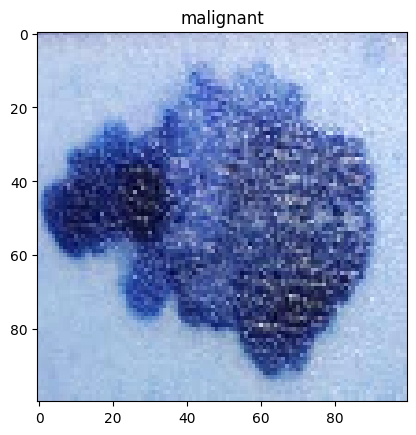

In [ ]:
plt.title(name_class[index])
plt.imshow(img)

###MODEL AFTER AUGMENTATION

####Train_Test_Split

In [ ]:
# Split the data into train and test sets after augmentation
train_aug,test_aug=train_test_split(data_aug,test_size=0.25,random_state=42)

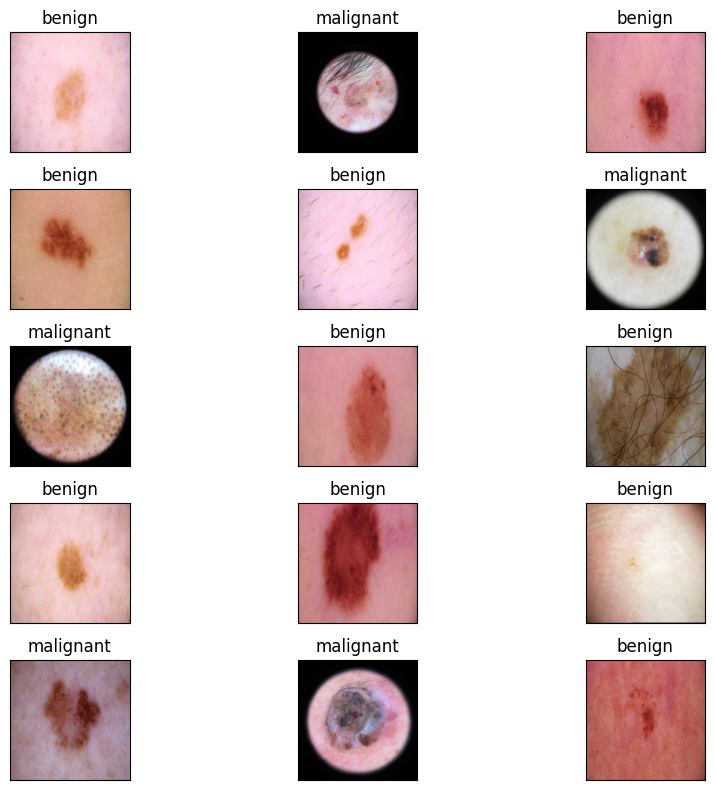

In [ ]:
fig,axes=plt.subplots(nrows=5,ncols=3,figsize=(10,8),subplot_kw={'xticks':[],'yticks':[]})
for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data_aug.Filepath[i]))
    ax.set_title(data_aug.Label[i])
plt.tight_layout()
plt.show()

### DATA_PREPROCESSING

In [ ]:
# Data augmentation using ImageDataGenerator
train_datagen_aug = ImageDataGenerator(rotation_range = 4,
                                  width_shift_range = 0.8,
                                  brightness_range = (0.2,0.9),
                                  shear_range = 0.1,
                                  zoom_range = 0.50,
                                  channel_shift_range = 0.90,
                                  fill_mode = 'nearest',
                                  cval = 0.87,
                                  horizontal_flip = True,
                                  vertical_flip = True)

test_datagen_aug = ImageDataGenerator(rotation_range = 4,
                                  width_shift_range = 0.8,
                                  brightness_range = (0.2, 0.9),
                                  shear_range = 0.1,
                                  zoom_range = 0.50,
                                  channel_shift_range = 0.90,
                                  fill_mode = 'nearest',
                                  cval = 0.87,
                                  horizontal_flip = True,
                                  vertical_flip = True)

In [ ]:
# Create data generators for training, validation, and testing using augmented data
train_gen_aug=train_datagen_aug.flow_from_dataframe( 
    dataframe=train_aug,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42    
)

valid_gen_aug=train_datagen_aug.flow_from_dataframe( 
    dataframe=test_aug,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42    
)

test_gen_aug=test_datagen_aug.flow_from_dataframe( 
    dataframe=test_aug,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
    
)

Found 7203 validated image filenames belonging to 2 classes.
Found 2402 validated image filenames belonging to 2 classes.
Found 2402 validated image filenames belonging to 2 classes.


In [ ]:
#Build the model after data augmentation
model_aug = Sequential()
model_aug.add(Conv2D(16, 3, padding = 'same', activation='relu', input_shape=(100, 100, 3)))
model_aug.add(Conv2D(16, 3, padding = 'same', activation='relu'))
model_aug.add(MaxPooling2D(pool_size=2))
model_aug.add(Dropout(0.2))

model_aug.add(Conv2D(64, 3, padding='same', activation = 'relu'))
model_aug.add(Conv2D(64, 3, padding='same', activation = 'relu'))
model_aug.add(MaxPooling2D(pool_size=2))

model_aug.add(Conv2D(128, 3, padding='same', activation = 'relu'))
model_aug.add(Conv2D(128, 3, padding='same', activation = 'relu'))
model_aug.add(MaxPooling2D(pool_size=2))

model_aug.add(Dropout(0.2))
model_aug.add(Flatten())
model_aug.add(Dense(128, activation='relu'))
model_aug.add(Dropout(0.1))
model_aug.add(Dense(64, activation='relu'))
model_aug.add(Dropout(0.1))
model_aug.add(Dense(32, activation='relu'))
model_aug.add(Dropout(0.1))
model_aug.add(Dense(16, activation='relu'))
model_aug.add(Dropout(0.1))
model_aug.add(Dense(2, activation='sigmoid'))


In [ ]:
model_aug.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
### Function for early stopping of training epochs if no change in validation accuracy
my_callbacks=[EarlyStopping(monitor='val_accuracy',
                           min_delta=0,
                           patience=2,
                           mode='auto')]

In [ ]:
model_aug.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        9280      
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        36928     
                                                        

In [ ]:
# Train the model with data augmentation
history = model_aug.fit(
    train_gen_aug,
    validation_data=valid_gen_aug,
    epochs=50
)

Epoch 1/50
226/226 [==============================] - 66s 226ms/step - loss: 0.8061 - accuracy: 0.5945 - val_loss: 0.6039 - val_accuracy: 0.6420
Epoch 2/50
226/226 [==============================] - 53s 233ms/step - loss: 0.5861 - accuracy: 0.6601 - val_loss: 0.5859 - val_accuracy: 0.6424
Epoch 3/50
226/226 [==============================] - 50s 220ms/step - loss: 0.5824 - accuracy: 0.6658 - val_loss: 0.5257 - val_accuracy: 0.6836
Epoch 4/50
226/226 [==============================] - 50s 220ms/step - loss: 0.5363 - accuracy: 0.7223 - val_loss: 0.4767 - val_accuracy: 0.7906
Epoch 5/50
226/226 [==============================] - 51s 226ms/step - loss: 0.5223 - accuracy: 0.7477 - val_loss: 0.4957 - val_accuracy: 0.7427
Epoch 6/50
226/226 [==============================] - 50s 222ms/step - loss: 0.4957 - accuracy: 0.7812 - val_loss: 0.4689 - val_accuracy: 0.7923
Epoch 7/50
226/226 [==============================] - 50s 222ms/step - loss: 0.4578 - accuracy: 0.7929 - val_loss: 0.4956 - val_ac

In [ ]:
# Save the model
model_aug.save("custom_model.h5")

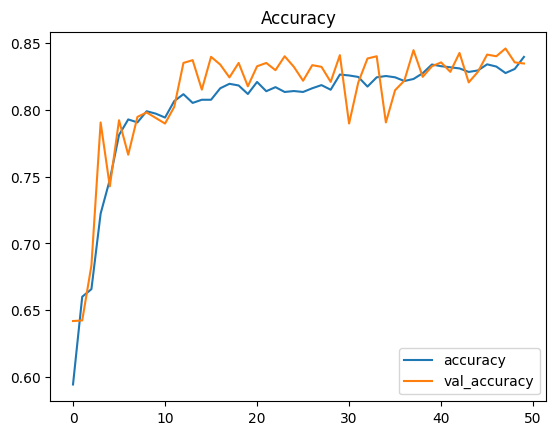

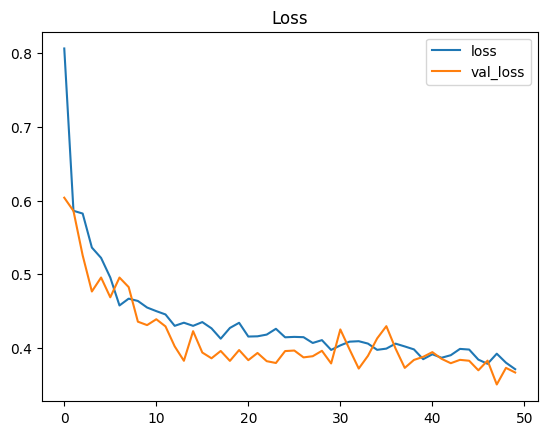

In [ ]:
# Plot accuracy and loss curves
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
# Evaluate the model on the test set
results=model_aug.evaluate(test_gen_aug,verbose=0)
print(" Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1]*100))

 Test Loss: 0.36266
Test Accuracy: 84.18%


In [ ]:
# Predict classes for the test set
pred=model_aug.predict(test_gen_aug)
pred=np.argmax(pred,axis=1)

#Map class indices to class labelslabels=(train_gen_aug.class_indices)
labels=dict((v,k) for k,v in labels.items())
pred=[labels[k] for k in pred]

76/76 [==============================] - 12s 151ms/step


In [ ]:
# Get the ground truth labels for the test set
y_test_aug=list(test_aug.Label)
# Print classification report and confusion matrix
print(classification_report(y_test_aug,pred))

              precision    recall  f1-score   support

      benign       0.86      0.83      0.84      1247
   malignant       0.82      0.85      0.84      1155

    accuracy                           0.84      2402
   macro avg       0.84      0.84      0.84      2402
weighted avg       0.84      0.84      0.84      2402



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_aug, pred))

[[1036  211]
 [ 174  981]]


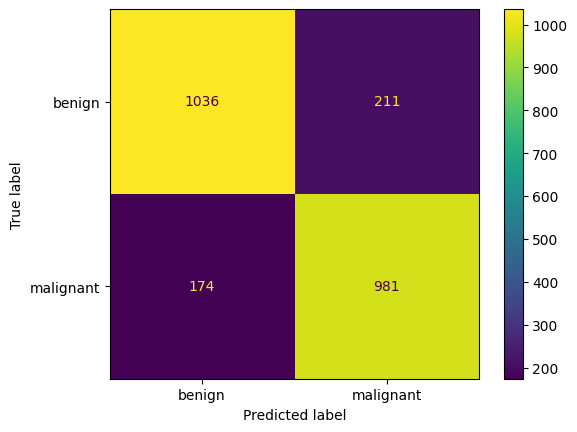

In [ ]:
# Plot a confusion matrix heatmap
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test_aug, pred)


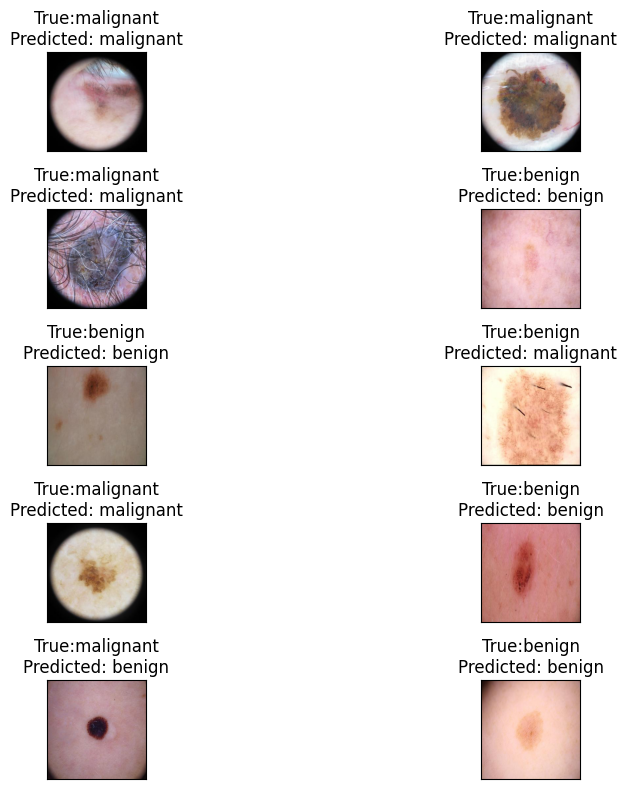

In [ ]:
# Visualize some images from the test set with their true and predicted labels
fig,axes=plt.subplots(nrows=5, ncols=2, figsize=(12,8),
                     subplot_kw={'xticks': [], 'yticks': []})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_aug.Filepath.iloc[i]))
    ax.set_title(f"True:{test_aug.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
# Path to the image to be predicted
img_path='demo.jpg'

# Read and resize the image
img=cv2.imread(img_path)
img=cv2.resize(img,(100,100))

x=np.expand_dims(img,axis=0)
# Preprocess the image
x=preprocess_input(x)

# Make predictions on the image
result=model_aug.predict(x)
print((result*100).astype('int'))

1/1 [==============================] - 0s 156ms/step
[[57 42]]


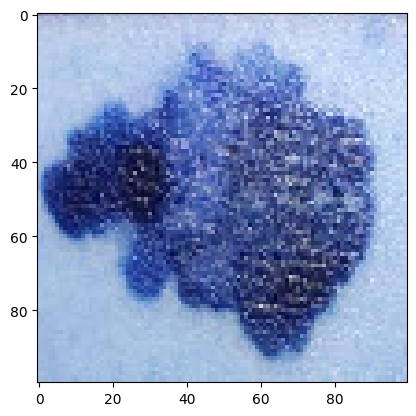

In [ ]:
plt.imshow(img)

In [ ]:
# Process the prediction probabilities
p=list((result*100).astype('int'))
pp=list(p[0])
print(pp)

[57, 42]


In [ ]:
# Find the largest probability
print("Largest probability is:",max(pp))

Largest probability is: 57


In [ ]:
# Find the index of the largest probability
index=pp.index(max(pp))

In [ ]:
# Class labels
name_class=['benign','malignant']

In [ ]:
name_class[index]

'benign'

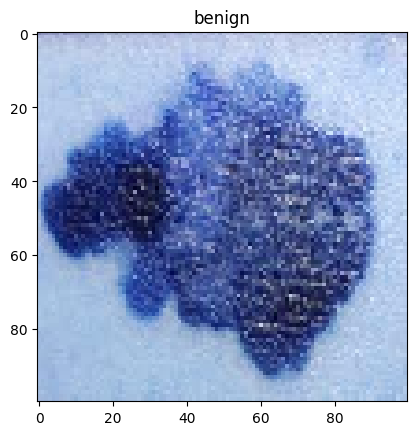

In [ ]:
plt.title(name_class[index])
plt.imshow(img)